# Histogram Equalization Implementation

This notebook contains a manual implementation of the histogram equalization algorithm to enhance image contrast by effectively spreading out the most frequent intensity values.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram Equalization Algorithm
The process involves computing the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF) to map original pixel intensities.

In [2]:
def histogram_equalization(image):
    """
    Perform histogram equalization on a grayscale image.
    :param image: Input grayscale image
    :return: Equalized image, original histogram
    """

    # Step 1: Flatten the image
    flat = image.flatten()

    # Step 2: Compute histogram
    hist = np.zeros(256)
    for pixel in flat:
        hist[pixel] += 1

    # Step 3: Normalize histogram (PDF)
    pdf = hist / np.sum(hist)

    # Step 4: Compute CDF
    cdf = np.zeros(256)
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + pdf[i]

    # Step 5: Compute transformation function
    transform = np.round(cdf * 255).astype(np.uint8)

    # Step 6: Map original image pixels
    equalized_image = transform[image]

    return equalized_image, hist

### Visualization Utility

In [3]:
def plot_results(original, equalized, original_hist):
    """
    Plot original & equalized images and their histograms
    """

    # Compute histogram for equalized image
    equalized_hist = np.zeros(256)
    for pixel in equalized.flatten():
        equalized_hist[pixel] += 1

    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 2, 2)
    plt.title("Original Histogram")
    plt.plot(original_hist)
    plt.xlim([0, 256])

    # Equalized Image
    plt.subplot(2, 2, 3)
    plt.title("Equalized Image")
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

    # Equalized Histogram
    plt.subplot(2, 2, 4)
    plt.title("Equalized Histogram")
    plt.plot(equalized_hist)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

### Main Execution

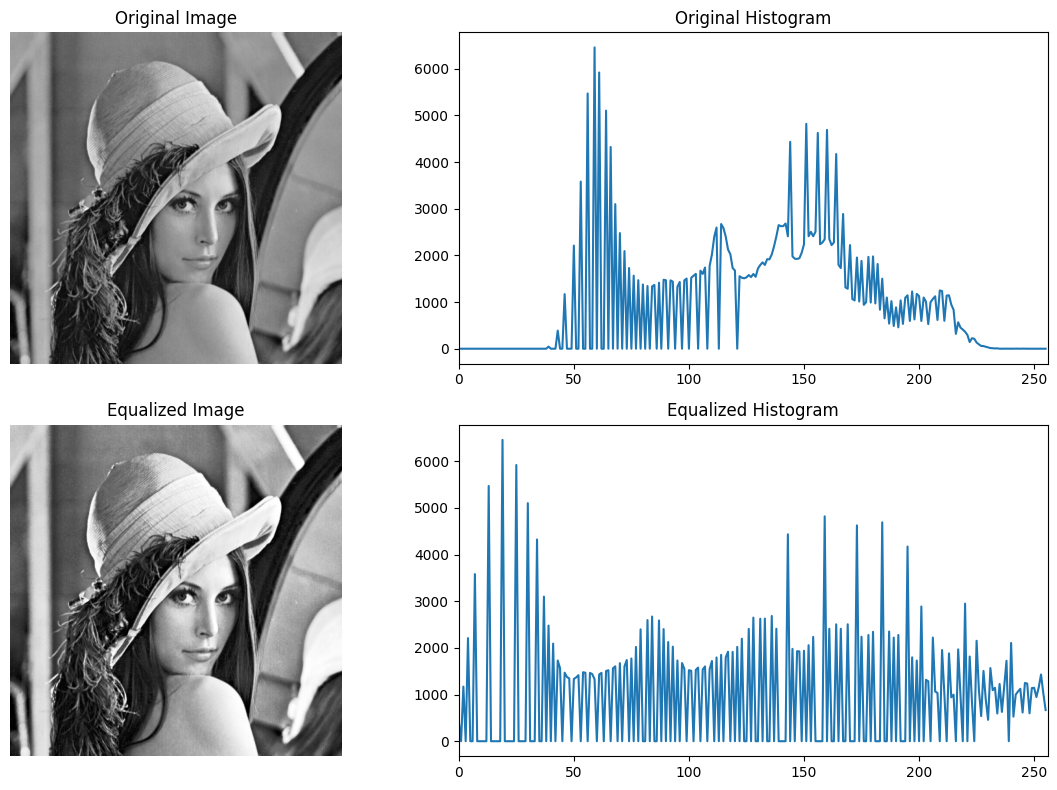

In [4]:
# Read image (convert to grayscale)
image = cv2.imread("input.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found!")
else:
    equalized_img, original_hist = histogram_equalization(image)
    plot_results(image, equalized_img, original_hist)